In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
df1 = pd.read_csv('/content/Taxi_Trips_-_2024_20240408.csv')
df1.head(3)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN


In [16]:
features = ['Trip Seconds', 'Trip Miles', 'Extras', 'Payment Type', 'Company']
target = 'Trip Total'

df1 = df1[features + [target]]



In [17]:
df1 = df1.dropna(subset=[target])
df1['Trip Seconds'] = df1['Trip Seconds'].fillna(0)
df1['Trip Miles'] = df1['Trip Miles'].fillna(0)
df1['Extras'] = df1['Extras'].fillna(0)
df1['Payment Type'] = df1['Payment Type'].fillna('Unknown')
df1['Company'] = df1['Company'].fillna('Unknown')


In [18]:
categorical_cols = ['Payment Type', 'Company']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df1[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols), index=df1.index)



In [19]:
X = pd.concat([df1[['Trip Seconds', 'Trip Miles', 'Extras']], encoded_df], axis=1)
y = df1[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Model Trained Successfully")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


comparison_df = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10].round(2),
    'Error': (y_test.values[:10] - y_pred[:10]).round(2)
})
print("\n📋 Sample Predictions:")
print(comparison_df)

✅ Model Trained Successfully
R² Score: 0.5519
RMSE: 27.88

📋 Sample Predictions:
   Actual  Predicted  Error
0   20.25      21.79  -1.54
1   11.78      11.73   0.05
2   57.50      55.30   2.20
3   54.70      24.59  30.11
4   39.68      43.13  -3.45
5   13.50      10.08   3.42
6    9.00       7.92   1.08
7   22.25      17.63   4.62
8   61.80      57.46   4.34
9   43.00      48.84  -5.84


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128661 (\N{TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


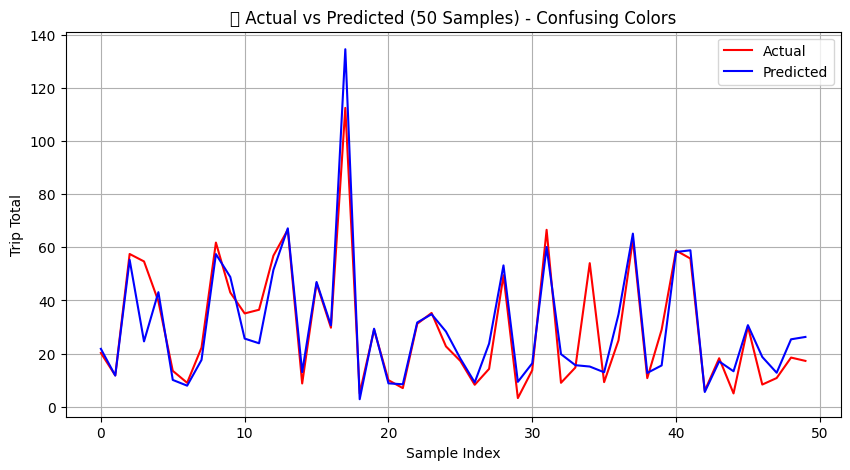

In [22]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label='Actual', color='red')
plt.plot(y_pred[:50], label='Predicted', color='blue')
plt.title("🚕 Actual vs Predicted (50 Samples) - Confusing Colors")
plt.xlabel("Sample Index")
plt.ylabel("Trip Total")
plt.legend()
plt.grid(True)
plt.show()
